In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [8]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])
my_data

array([0.18 , 0.277, 0.105, 0.126, 0.225, 0.026, 0.123, 0.423, 0.006,
       0.281, 0.05 , 0.692, 0.105, 0.275, 0.346, 0.079, 0.045, 0.222,
       0.063, 0.281])

(array([1.020e+02, 1.363e+03, 3.409e+03, 3.125e+03, 1.417e+03, 4.360e+02,
        1.210e+02, 2.000e+01, 5.000e+00, 1.000e+00]),
 array([0.40105796, 0.51918178, 0.6373056 , 0.75542942, 0.87355324,
        0.99167706, 1.10980088, 1.2279247 , 1.34604852, 1.46417235,
        1.58229617]),
 <a list of 10 Patch objects>)

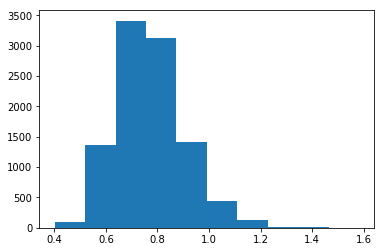

In [5]:
n = 20
lam0 = 3
lambdavalues=[]
for _ in np.arange(1,10000):
    lam = 1/np.mean(stats.expon.rvs(1 / lam0, size = n))
    lambdavalues = np.append(lam,lambdavalues)
    
lambdavalues
plt.hist(lambdavalues)

...

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis.  (Remember power is the probability we reject the null hypothesis given it is false)

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [4]:
crit= stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [5]:
n=20
lam0=3
ts = []
for _ in np.arange(1000):
    sim_data = stats.expon.rvs(scale = 1/5, size = 20)
    test_stat = -2*log((np.mean(sim_data)**n)*(lam0**n)*e**(-lam0*sum(sim_data) + n))
    ts=np.append(ts, test_stat)
    
np.mean(ts>=crit)

0.611

Repeat for a sample size of 50. What do you expect to happen to power? 

In [6]:
n=50
lam0=3
ts = []
for _ in np.arange(1000):
    sim_data = stats.expon.rvs(scale = 1/5, size = 20)
    test_stat = -2*log((np.mean(sim_data)**n)*(lam0**n)*e**(-lam0*sum(sim_data) + n))
    ts=np.append(ts, test_stat)
    
np.mean(ts>=crit)

0.071

The power should have goen up, the higher the sample size ,the higher the probability we rejet the null correctly

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

In [12]:
obs_mean = np.mean(my_data)

In [10]:
ts = [np.mean(stats.expon.rvs(scale = 1/3, size = 20)) for _ in np.arange(10000)]

In [22]:
2*np.mean(ts<=obs_mean)

0.0338

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [27]:
lower,upper = np.percentile(ts,[2.5,97.5])

In [28]:
ts_power=[np.mean(stats.expon.rvs(scale=1/5,size=20)) for _ in np.arange(10000)]
np.mean(ts_power<=lower)+np.mean(ts_power>=upper)

0.5675

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [29]:
ts = [np.mean(stats.expon.rvs(scale=1/3, size = 20)) for _ in np.arange(10000)]
lower,upper= np.percentile(ts,[2.5,97.5])
ts_power=[np.mean(stats.expon.rvs(scale=1/3,size=20)) for _ in np.arange(10000)]
np.mean(ts_power<=lower)+np.mean(ts_power>=upper)

0.0493

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [30]:
ts50 = [np.mean(stats.expon.rvs(scale=1/3, size = 50)) for _ in np.arange(10000)]
lower50,upper50= np.percentile(ts50,[2.5,97.5])
tsp50=[np.mean(stats.expon.rvs(scale=1/3,size=50)) for _ in np.arange(10000)]
np.mean(tsp50<=lower50)+np.mean(tsp50>=upper50)

0.0485